# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

## Notes from readings

- A key discovery of network science is that the architecture of networks emerging in various domains of science, nature, and technology are similar to each other, a consequence of being governed by the same organizing principles. Consequently we can use a common set of mathematical tools to explore these systems.

### Terms
- Directed/undirected links: The links of a network can be *directed* or *undirected*. Some systems have directed links, like the WWW, whose uniform resource locators (URL) point from one web document to the other, or phone calls, where one person calls the other. Other systems have undirected links, like romantic ties: if I date Janet, Janet also dates me, or like transmission lines on the power grid, on which the electric current can flow in both directions.
 
 
- Degree: A key property of each node is its *degree*, representing the number of links it has to other nodes. The degree can represent the number of mobile phone contacts an individual has in the call graph (i.e. the number of different individuals the person has talked to), or the number of citations a research paper gets in the citation network.
 - In directed networks we distinguish between *incoming degree*, representing the number of links that point to node $i$, and *outgoing degree*, representing the number of links that point from node $i$ to other nodes
 
 
- Degree distribution: The *degree distribution*, provides the probability that a randomly selected node in the network has degree $k$. Can be plotted as a histogram. 


- Adjency matrix: The *adjacency matrix* of a directed network of $N$ nodes has $N$ rows and $N$ columns, its elements being:
 - $A_{ij} = 1$ if there is a link pointing from node $j$ to node $i$
 - $A_{ij} = 0$ if nodes $i$ and $j$ are not connected to each other
 
 The adjacency matrix of an undirected network is symmetric, $A_ij = A_ji$. 
 
 
- Connectedness: In an undirected network nodes $i$ and $j$ are *connected* if there is a path between them. They are *disconnected* if such a path does not exist, in which case we have $d_{ij} = \infty$, where $d_{ij}$ is the . A network is connected if all pairs of nodes in the network are connected. A network is disconnected if there is at least one pair with  $d_{ij} = \infty$.


- Path and path length: In networks, physical distance is replaced by *path length*. A *path* is a route that runs along the links of the network. A *path’s length* represents the number of links the path contains. 


- Distance: The *shortest path* between nodes $i$ and $j$ is the path with the fewest number of links. The shortest path is often called the *distance* between nodes $i$ and $j$, and is denoted by $d_{ij}$, or simply $d$.
 - The longest shortest path is called the *diameter* of a network. 


- Component/cluster: Two subnetworks in a disconnected network are called *components* or *clusters*. A *component* is a subset of nodes in a network, so that there is a path between any two nodes that belong to the component, but one cannot add any more nodes to it that would have the same property. 


- Bridge: A *bridge* is any link that, if cut, disconnects the network.


- Clustering coefficient: The *clustering coefficient* captures the degree to which the neighbors of a given node link to each other. For a node $i$ with degree $k_i$, the local clustering coefficient is defined as 
 
 $$
 C_i = \frac{2L_i}{k_i(k_i-1)}
 $$

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Notes from lecture

Different types of networks:
- Simple networks are characterised by being:
 - Undirected, i.e. there is no direction of the links
 - Unweighted, i.e. there is no strength of the links
 - No self-loops, i.e. a node cannot be connected to itself.
 - Adjecency matrix is symmetric
 
- Directed and weighted networks can be:
 - Directed
 - Weighted
 - Self-looping 
 - Adjecency matrix is not symmetric
 
- Directed acyclical network are characterised by being:
 - Directed
 - No self-loops
 
- Bipartite networks are characterised by being:
 - To types
 - No within-type links
 
- Temporal networks are characterised by:
 - Links have timestamps

## Imports

In [57]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

**Answer:**

1. Social network: Nodes are persons and links are friendships
2. Transportation network: Nodes are destinations and links are routes (from lecture slides: physical material being transported)
3. Information network: Nodes are blogs and links are recommendations of other blogs

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

**Answer:**

I think that the networks I'm most interested in are social networks. 

- As stated above, the nodes of a social network are persons and the links are relations, as for example friendships. 
- The size of social networks varies a lot depending on the specific definition. But I guess that one social network contains all humans on Earth. 
- The social network can be mapped out to some extent using data from social platforms like Facebook or from cell phones. 
- One reason why I think social networks are interesting is because the behaviour of a person is highly dependent on the behaviour of people in his social network. 

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

**Answer:**

I think network science could have the biggest impact in the health area in the next decade. The use of network science in biology, medicine and pharmacology has increased a lot in the last decade, according to the book. I think that our understanding of human diseases and drug developing can be improved significantly, which in turn can lead to the development of cures and vaccines etc. for a lot of diseases. This will have a huge impact on our society (both good and bad to some extent). 

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

**Answer:**

A network is *sparse* if the total number of links is smaller than the maximum number of links possible in the network. 

In the social network in Paradise Hotel, where the nodes are persons and the links are sexual contact, each node have relatively many links. But the network is still sparse, which is mostly due to the fact that some of the persons are heterosexual, i.e. they don't have links with other persons of the same gender as them. 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (2, 3), (2, 4)]


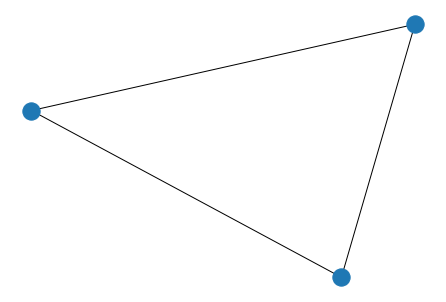

In [17]:
# 0. Initialise empty graph
G = nx.Graph()

# 1. Add nodes and edges
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])

# 2. Print nodes and edges
print(f'Nodes: {G.nodes()}')
print(f'Edges: {G.edges()}')

# 3. Delete a node
G.remove_node(4)

# 4. Plot graph
nx.draw(G)
plt.show()

> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

**Answer to 1:**

An Erdős–Rényi network is a random network, or a random graph. To make the network, we need to specify the number of nodes, $N$, and the probability of two nodes being connected, $p$. The network is then created by first adding the $N$ nodes and then, for each pair of nodes, assigning a link between them with probability $p$. 

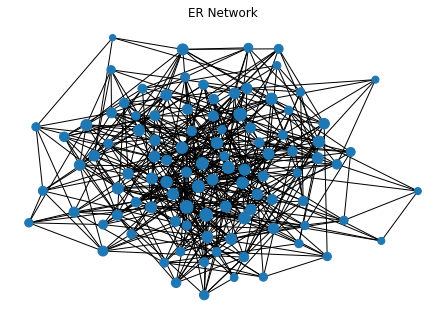

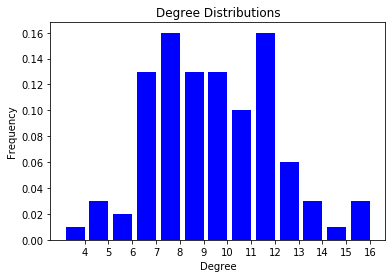

In [34]:
# 2. Create an ER network
N = 100
ER = nx.fast_gnp_random_graph(n=N, p=0.1)

# 3. Plot the network
nx.draw(ER, node_size=[ER.degree(i)*10 for i in ER])
plt.title("ER Network")
plt.show()

# 4. Visualise degree distribution
degree_sequence = sorted([d for n, d in ER.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
freq = [i/N for i in cnt]

fig, ax = plt.subplots()
plt.bar(deg, freq, width=0.80, color='b')

plt.title("Degree Distributions")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

**Answer to 1:**

*Hubs* are nodes with exceptionally many links. In random networks, most nodes have comparable degrees (they're Poisson distributed) and nodes with a large number of links are absent, i.e. there are no hubs. But they exist in real networks. Random networks have two assumptions that do not fit on real networks:

1. There is a fixed number of nodes. In real networks, the number of nodes grows. 

2. All nodes have the same probability of being linked. In most real networks there is *preferential attachment*, which means that new nodes prefer to link to more connected nodes. 

The Barbási-Albert (BA) model is inspired by the above characteristica of many real networks. A BA network is also random and starts with $m_0$ nodes that have random links (minimum one each). Then, the network develops as one node with $m$ links is added at each timestep, such that it's attached to $m$ nodes already in the network. The probability of generating a link to an already existing node is positively related to the degree of that node.  



**Answer to 5:**

The main difference between the ER network and the BA network is: The degree distribution of the ER network is bell-shaped, so most nodes have comparable degrees, which can also be seen from the plot of the ER distribution, where the size of the dot at each node is weighted with the degree of the node. The degree distribution of the BA network, on the other hand, shows that most nodes have few links which are connected by few hubs with many links. 



**Answer to 6:**

Probably, but I don't have a good answer to this. 

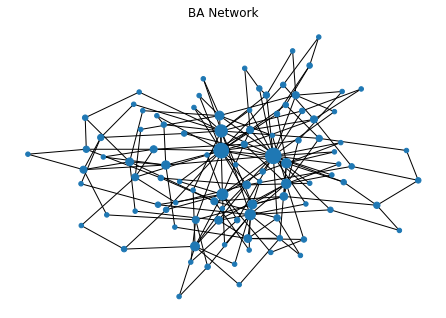

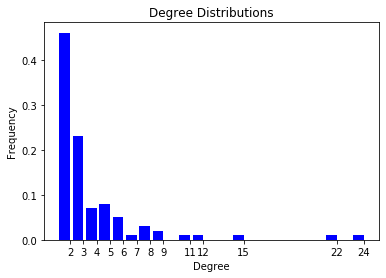

In [33]:
# 2. Create a BA network
BA = nx.barabasi_albert_graph(n=N, m=2)

# 3. Plot the network
nx.draw(BA, node_size=[BA.degree(i)*10 for i in BA])
plt.title("BA Network")
plt.show()

# 4. Visualise degree distribution
degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
freq = [i/N for i in cnt]

fig, ax = plt.subplots()
plt.bar(deg, freq, width=0.80, color='b')

plt.title("Degree Distributions")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [38]:
data = pd.read_csv(
    "facebook-wall.txt.gz",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [41]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [52]:
# Defining function to slice up data with custom time bounds
def slice_it_up(data, t0, t1):
    
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t

# Create aggregated network for the last 365 days of the data
t0_ = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 365 days before last wall post)
t1_ = data.timestamp.max()                # Upper bound of time-slice

G_t_ = slice_it_up(data, t0_, t1_)

# Print number nodes and edges
print(f'Number of nodes: {G_t_.number_of_nodes()}')
print(f'Number of edges: {G_t_.number_of_edges()}')

Number of nodes: 44397
Number of edges: 201632


> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

**Answer:**



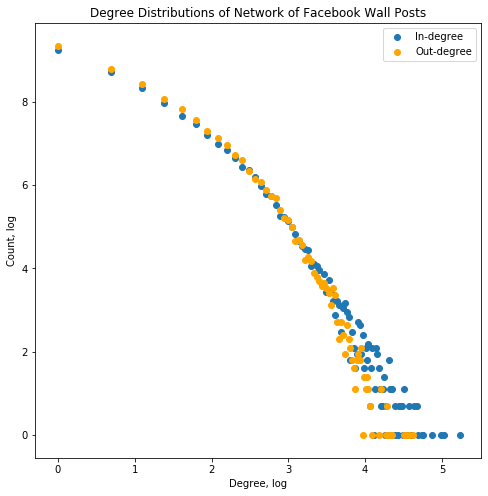

In [141]:
import numpy as np

# Initialise figure
fig, ax = plt.subplots(1, figsize=(8,8))

# In-degrees
degree_sequence = sorted([d for n, d in G_t_.in_degree()], reverse=True)
degree_in = degree_sequence
degree_in_count = Counter(degree_in)
deg_in, cnt_in = zip(*degree_in_count.items())

# i. Remove 0 from axes
delete = deg_in.index(0)
deg_in_ = np.delete(deg_in, delete)
cnt_in_ = np.delete(cnt_in, delete)

# ii. Log-transform both axes
deg_in_log = np.log(deg_in_)
cnt_in_log = np.log(cnt_in_)

# iii. Plot in-degrees
plt.scatter(x=deg_in_log, y=cnt_in_log, label="In-degree")

# Out-degrees
degree_sequence = sorted([d for n, d in G_t_.out_degree()], reverse=True)  # degree sequence
degree_out = degree_sequence
degree_out_count = Counter(degree_out)
deg_out, cnt_out = zip(*degree_out_count.items())

# i. Remove 0 from axes
delete = deg_out.index(0)
deg_out_ = np.delete(deg_out, delete)
cnt_out_ = np.delete(cnt_out, delete)

# ii. Log-transform both axes
deg_out_log = np.log(deg_out_)
cnt_out_log = np.log(cnt_out_)

# iii. Plot out-degrees
plt.scatter(x=deg_out_log, y=cnt_out_log, c='orange', label="Out-degree")

# Make figure look nice
plt.title("Degree Distributions of Network of Facebook Wall Posts")
plt.ylabel("Count, log")
plt.xlabel("Degree, log")
plt.legend()

plt.show()

> **Ex: 9.2.3**: Using a histogram, plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: Figure out how to plot a histogram with logarithmic bins.*

**Answer:**

The log local weighted clustering coefficients of the Facebook wallposts seem to follow a normal distribution.


(The *local clustering coefficient*, $C_i$, measures the density of links in node $i$’s immediate neighborhood: $C_i = 0$ means that there are no links between $i$’s neighbors; $C_i = 1$ implies that each of the $i$’s neighbors link to each other.)

Text(0, 0.5, 'Frequency')

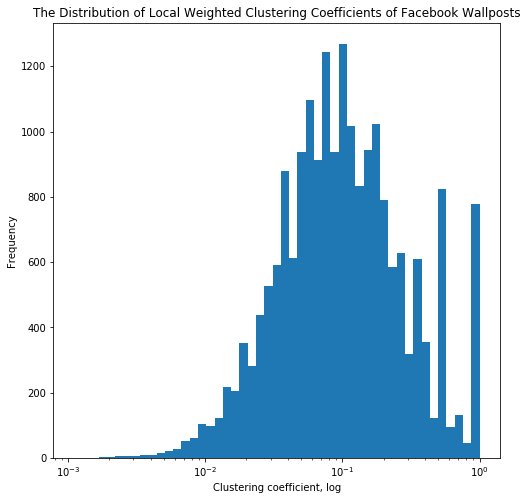

In [155]:
# Compute the local weighted clustering coefficients
cluster_coef = nx.clustering(G_t_, nodes=G_t_.nodes(), weight='weight')

# Remove negative values
cluster_coeff_pos = dict((key, val) for key, val in cluster_coeff.items() if val > 0) 

# Sort the cluster coefficients
cluster_sequence = sorted([d for n, d in cluster_coeff_pos.items()], reverse=True)

# Plot the histogram with a logarithmic x-axis
plt.figure(figsize=(8,8))
plt.hist(cluster_sequence, bins = 10 ** np.linspace(np.log10(min(cluster_sequence)), np.log10(max(cluster_sequence))))
plt.gca().set_xscale('log')
plt.title("The Distribution of Local Weighted Clustering Coefficients of Facebook Wallposts")
plt.xlabel("Clustering coefficient, log")
plt.ylabel("Frequency")

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

**Answer:**

It just looks like a hairball, maybe with some clusters.

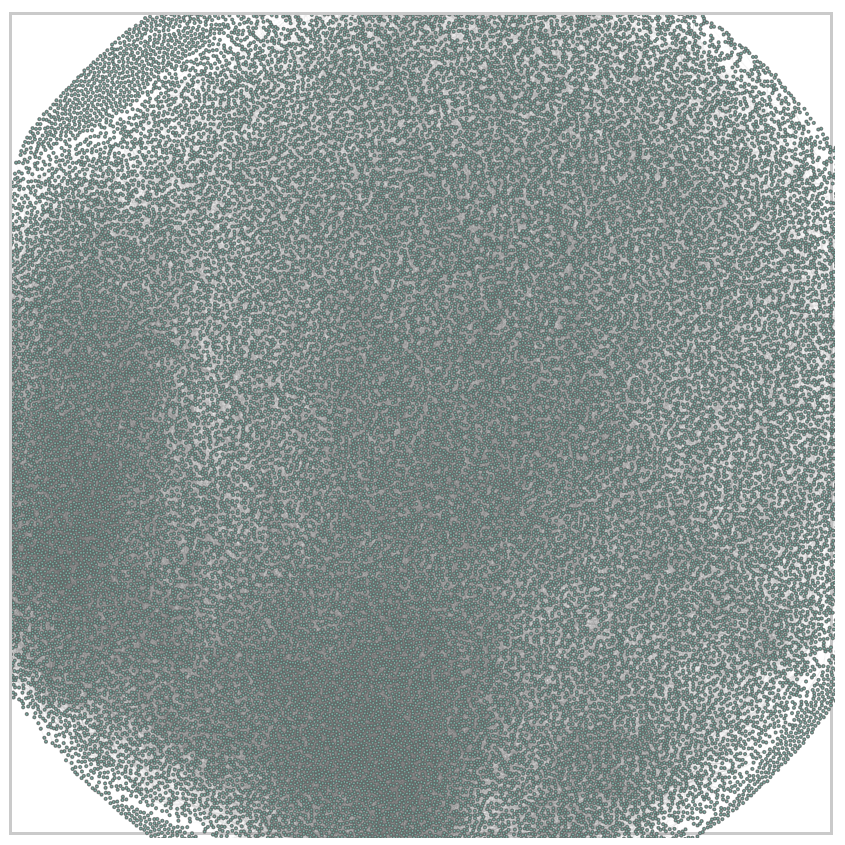

In [235]:
visualize(G_t_)

(None, None)

**Note:**

There was a lot of exercises in this exercise set, which we haven't heard about in the lecture or read about in the text. I don't know if this was on purpose, but it seems a bit weird. 